In [1]:
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("runs/barrel/yolov8n_custom/weights/best.pt")


image 1/1 c:\Users\dk\Desktop\barrel_detection\data\val\PXL_20240705_130706817.jpg: 640x480 1 hull, 1 turret, 96.8ms
Speed: 3.0ms preprocess, 96.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 480)


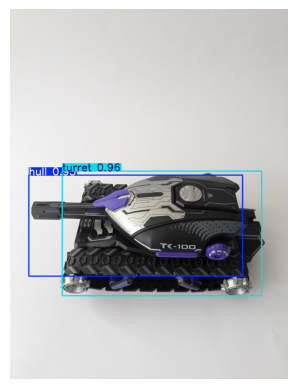

In [7]:
# Define the path or URL to the image
image_path = "data/val/PXL_20240705_130706817.jpg" # should be test image, not valid image (used for testing as there is no test image)

# Run inference on the image
results = model(image_path)

# Get the first result (assuming only one image was passed)
result = results[0]

# Display the results
# Get the original image with bounding boxes and labels
result_img = result.plot() # This plots bounding boxes and labels on the image

# Convert the image from BGR to RGB
result_img_rgb = result_img[:, :, ::-1]

# Display the image
plt.imshow(result_img_rgb)
plt.axis('off') # Hide axes
plt.show()

In [8]:
# Extract keypoints for the barrel and the tank
keypoints_data = result.keypoints.xy.cpu().numpy()

# Assuming the first row is for the barrel and the second for the tank
barrel_keypoints = keypoints_data[0]
tank_keypoints = keypoints_data[1]

# Define the keypoints for barrel and tank
barrel_points = {
    "muzzle": barrel_keypoints[0],
    "intersection": barrel_keypoints[1]
}

tank_points = {
    "top-right": tank_keypoints[0],
    "bottom-right": tank_keypoints[1]
}

In [9]:
# Function to calculate the angle between two vectors
def calculate_angle(pt1, pt2, pt3, pt4):
    # Vector from pt1 to pt2 (barrel)
    vector1 = np.array(pt2) - np.array(pt1)
    # Vector from pt3 to pt4 (tank)
    vector2 = np.array(pt4) - np.array(pt3)

    # Calculate the angle between two vectors
    unit_vector1 = vector1 / np.linalg.norm(vector1)
    unit_vector2 = vector2 / np.linalg.norm(vector2)
    dot_product = np.dot(unit_vector1, unit_vector2)
    angle = np.arccos(dot_product)

    # Convert from radians to degrees
    angle = np.degrees(angle)
    return angle

In [10]:
# Calculate the rotation angle between the barrel and the tank
angle = calculate_angle(barrel_points["muzzle"], barrel_points["intersection"], tank_points["top-right"], tank_points["bottom-right"])

# Print the end barrel as a vector
print(f"Barrel vector: Barrel end (Muzzle) ({barrel_points['muzzle'][0]:.2f}, {barrel_points['muzzle'][1]:.2f}), Barrel start ({barrel_points['intersection'][0]:.2f}, {barrel_points['intersection'][1]:.2f})")

# Print the rotation angle
print(f"Estimated Rotation Angle: {angle:.2f} degrees")

# Determine the direction of the barrel relative to the hull
if angle == 0:
    print("The barrel is pointing at the front of the hull.")
elif angle == 180 or angle == -180:
    print("The barrel is pointing at the rear of the hull.")
elif angle > 0:
    print(f"The barrel is oriented {angle:.2f} degrees to the right of the hull.")
else: # angle < 0
    print(f"The barrel is oriented {abs(angle):.2f} degrees to the left of the hull.")

# Assuming barrel_points dictionary contains the points 'muzzle' and 'intersection'
muzzle_x, muzzle_y = barrel_points['muzzle']
intersection_x, intersection_y = barrel_points['intersection']

# Calculate the orientation vector components
orientation_vector_x = muzzle_x - intersection_x
orientation_vector_y = muzzle_y - intersection_y

# Print the orientation vector
print(f"Barrel Orientation vector: ({orientation_vector_x:.2f}, {orientation_vector_y:.2f})")

Barrel vector: Barrel end (Muzzle) (940.47, 2059.92), Barrel start (2015.13, 2079.22)
Estimated Rotation Angle: 2.52 degrees
The barrel is oriented 2.52 degrees to the right of the hull.
Barrel Orientation vector: (-1074.65, -19.30)
